In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.size

140000

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
df.drop(['RowNumber','Surname', 'CreditScore'],axis = 1 , inplace= True)

In [8]:
df.head(3)

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [29]:
df_spec = pd.read_csv("Churn_Modelling.csv", usecols=['Gender','Age','Tenure','Balance'])


In [18]:
df_spec.head(4)

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00


In [32]:
df_partial = pd.read_csv("Churn_Modelling.csv",  nrows = 500,usecols=['CustomerId','Surname','CreditScore','Geography'])

In [33]:
df_partial.tail(4)

,CustomerId,Surname,CreditScore,Geography
496,15662403,Kryukova,622,France
497,15733616,Sopuluchukwu,806,France
498,15591995,Barry,757,Germany
499,15677020,Selezneva,570,France


In [34]:
df_sample = df.sample(n=1000)

In [35]:
df_sample.head(2)

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9700,15797149,Spain,Female,36,4,143680.47,2,1,1,63531.19,0
9418,15643794,Spain,Female,27,2,0.00,1,1,1,82938.99,0


In [36]:
df_sample.shape

(1000, 11)

In [37]:
df.isna().sum()

CustomerId         0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [39]:
df.dropna(axis= 0, how='any', inplace = True)

In [41]:
france_churn= df[(df.Geography == 'France') & (df.Exited == 1)]

In [42]:
france_churn

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
35,15794171,France,Female,45,0,134264.04,1,1,0,27822.99,1
41,15738148,France,Female,51,8,122522.32,1,0,0,181297.65,1
43,15755196,France,Female,49,2,131394.56,1,0,0,194365.76,1
...,...,...,...,...,...,...,...,...,...,...,...
9920,15673020,France,Female,49,3,204510.94,1,0,1,738.88,1
9947,15732202,France,Male,34,1,83503.11,2,1,1,73124.53,1
9956,15707861,France,Female,46,10,85216.61,1,1,0,117369.52,1
9991,15769959,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [43]:
df2 = df.query('8000<Balance<100000')

<AxesSubplot:ylabel='Frequency'>

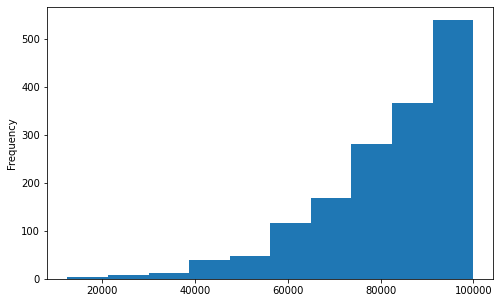

In [46]:
df2['Balance'].plot(kind = 'hist', figsize= (8,5))

In [47]:
df[df['Tenure'].isin([4,6])]

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,France,Male,44,4,142051.07,2,0,1,74940.50,0
10,15767821,France,Male,31,6,102016.72,2,0,0,80181.12,0
18,15661507,Spain,Male,45,6,0.00,1,0,0,158684.81,0
19,15568982,France,Female,24,6,0.00,2,1,1,54724.03,0
...,...,...,...,...,...,...,...,...,...,...,...
9985,15586914,France,Male,36,6,123841.49,2,1,0,96833.00,0
9988,15589329,France,Male,30,4,0.00,2,1,0,49337.84,0
9989,15605622,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9991,15769959,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [48]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).mean()

Exited
Geography Gender          
France    Female  0.203450
          Male    0.127134
Germany   Female  0.375524
          Male    0.278116
Spain     Female  0.212121
          Male    0.131124

In [50]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).mean()

Exited
Geography Gender          
France    Female  0.203450
          Male    0.127134
Germany   Female  0.375524
          Male    0.278116
Spain     Female  0.212121
          Male    0.131124

In [51]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

In [52]:
df.head(3)

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [56]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg({'Exited':'sum', 'Balance':'mean'})

In [57]:
df_summary

,Exited,Balance
Geography,,
France,810,62092.636516
Germany,814,119730.116134
Spain,413,61818.147763


In [59]:
df_new = df[['Geography','Exited','Balance']]\
.groupby(['Geography','Exited']).mean().reset_index()

In [60]:
df_new

,Geography,Exited,Balance
0,France,0,60339.275678
1,France,1,71192.795728
2,Germany,0,119427.106696
3,Germany,1,120361.075590
4,Spain,0,59678.070470
5,Spain,1,72513.352446


In [63]:
df[['CustomerId','Exited','Balance']].sample(n=6).reset_index()

,index,CustomerId,Exited,Balance
0,642,15809663,0,125406.58
1,5808,15694556,1,116563.58
2,9046,15648178,0,137964.51
3,5278,15799300,1,113688.63
4,1500,15590146,1,81947.76
5,5631,15782758,0,147650.68


In [66]:
df_new.set_index('Geography')

,Exited,Balance
Geography,,
France,0,60339.275678
France,1,71192.795728
Germany,0,119427.106696
Germany,1,120361.075590
Spain,0,59678.070470
Spain,1,72513.352446


In [70]:
group = np.random.randint(10, size=6)
df_new['Group'] = group

In [71]:
df_new

,Geography,Exited,Balance,Group
0,France,0,60339.275678,5
1,France,1,71192.795728,3
2,Germany,0,119427.106696,6
3,Germany,1,120361.075590,4
4,Spain,0,59678.070470,4
5,Spain,1,72513.352446,9


In [78]:
df_new.insert(0, 'Group2', group)
df_new

,Group2,Geography,Exited,Balance,Group
0,5,France,0,60339.275678,5
1,3,France,1,71192.795728,3
2,6,Germany,0,119427.106696,6
3,4,Germany,1,120361.075590,4
4,4,Spain,0,59678.070470,4
5,9,Spain,1,72513.352446,9


In [91]:
del df.loc["Group2"]

AttributeError: __delitem__

In [92]:
df_new['rank'] = df_new['Balance'].rank(method ='first', ascending = False).astype('int')

In [93]:
df_new

,Group2,Geography,Exited,Balance,Group,rank
0,5,France,0,60339.275678,5,5
1,3,France,1,71192.795728,3,4
2,6,Germany,0,119427.106696,6,2
3,4,Germany,1,120361.075590,4,1
4,4,Spain,0,59678.070470,4,6
5,9,Spain,1,72513.352446,9,3


In [94]:
df.memory_usage()

Index                128
CustomerId         80000
Geography          80000
Gender             80000
Age                80000
Tenure             80000
Balance            80000
NumOfProducts      80000
HasCrCard          80000
IsActiveMember     80000
EstimatedSalary    80000
Exited             80000
dtype: int64

In [95]:
df['Geography'] = df['Geography'].astype('category')

In [96]:
df.memory_usage()

Index                128
CustomerId         80000
Geography          10132
Gender             80000
Age                80000
Tenure             80000
Balance            80000
NumOfProducts      80000
HasCrCard          80000
IsActiveMember     80000
EstimatedSalary    80000
Exited             80000
dtype: int64

In [97]:
df_new['Group'].replace(0, 'B1')

0    5
1    3
2    6
3    4
4    4
5    9
Name: Group, dtype: int32

In [98]:
df

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:title={'center':'Customer salary'}, ylabel='Frequency'>

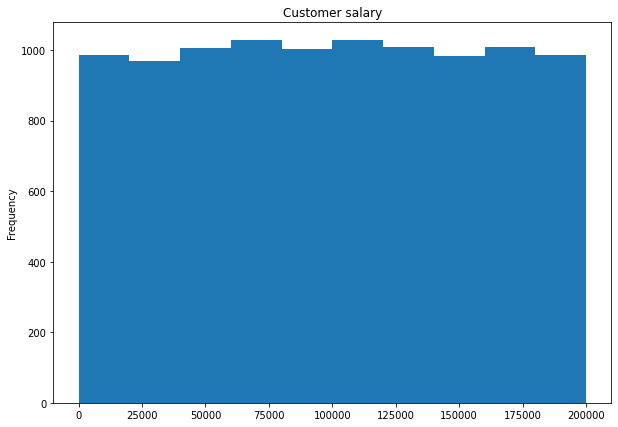

In [106]:
df['EstimatedSalary'].plot(kind = 'hist', figsize= (10,7
                                                   ), title = 'Customer salary')

# series

In [108]:
ser = pd.Series([2,4,6,3,6,2,5])
ser.pct_change()

0         NaN
1    1.000000
2    0.500000
3   -0.500000
4    1.000000
5   -0.666667
6    1.500000
dtype: float64

# for selecting special names 

In [109]:
df_new[df_new.Names.str.startswith('Mi')]

AttributeError: 'DataFrame' object has no attribute 'Names'

In [110]:
df

,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [111]:
df_new.style.highlight_max(axis=0, color='darkgreen')

,Group2,Geography,Exited,Balance,Group,rank
0,5,France,0,60339.275678,5,5
1,3,France,1,71192.795728,3,4
2,6,Germany,0,119427.106696,6,2
3,4,Germany,1,120361.075590,4,1
4,4,Spain,0,59678.070470,4,6
5,9,Spain,1,72513.352446,9,3
